In [1]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X_test, Y_test, 
                                                  test_size=0.3,
                                                  random_state=1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

def model_fn(a_layer=None):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
                 activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                        

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = EarlyStopping(patience=2,
                                  restore_best_weights=True)
# 모델 실행
history = model.fit(train_x, train_y, epochs=20,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
219/219 [==============================] - 7s 30ms/step - loss: 0.7228 - accuracy: 0.7496 - val_loss: 0.5212 - val_accuracy: 0.8073
Epoch 2/20
219/219 [==============================] - 6s 30ms/step - loss: 0.4514 - accuracy: 0.8430 - val_loss: 0.4462 - val_accuracy: 0.8437
Epoch 3/20
219/219 [==============================] - 6s 29ms/step - loss: 0.3837 - accuracy: 0.8654 - val_loss: 0.4184 - val_accuracy: 0.8537
Epoch 4/20
219/219 [==============================] - 6s 30ms/step - loss: 0.3260 - accuracy: 0.8854 - val_loss: 0.3624 - val_accuracy: 0.8740
Epoch 5/20
219/219 [==============================] - 7s 31ms/step - loss: 0.2807 - accuracy: 0.9021 - val_loss: 0.3764 - val_accuracy: 0.8697
Epoch 6/20
219/219 [==============================] - 7s 30ms/step - loss: 0.2523 - accuracy: 0.9111 - val_loss: 0.3845 - val_accuracy: 0.8727


313/313 [==============================] - 2s 5ms/step - loss: 0.2833 - accuracy: 0.9041

 Test Accuracy: 0.9041


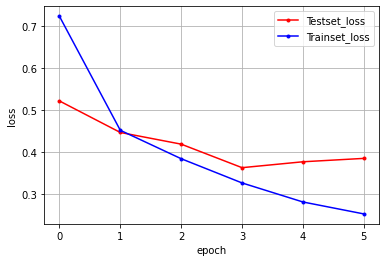

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
# 테스트 데이터로 확인
from keras.models import load_model

test_model = load_model('best-cnn-model.h5')

test_arr = np.random.choice(len(X_train), len(X_train)//10) #  index 추출

test_X = X_train[test_arr, :].astype('float32') / 255
test_Y = Y_train[test_arr]
# print(test_X.shape, test_Y.shape)

In [8]:
test_model.summary()
test_model.evaluate(test_X.reshape(-1,28,28,1), test_Y)  # 테스트 데이터로 결과 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                        

[2.776729106903076, 0.09916666895151138]

In [9]:
test_model.evaluate(test_X, test_Y)

188/188 [==============================] - 1s 6ms/step - loss: 2.7767 - accuracy: 0.0992


[2.776729106903076, 0.09916666895151138]